In [121]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt

In [111]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [5]:
digits = load_digits()

In [26]:
X = digits.data
y = digits.target

In [35]:
# X_df = pd.DataFrame(X)
# print(X_df.info)

In [52]:
cv_result = cross_validate(DecisionTreeClassifier(random_state=0), X, y, cv=10, n_jobs=-1)
cv_result['test_score']

array([0.8       , 0.86111111, 0.83333333, 0.77222222, 0.78888889,
       0.88333333, 0.87777778, 0.82681564, 0.79329609, 0.80446927])

In [49]:
cv_score = cross_val_score(DecisionTreeClassifier(random_state=0), X, y, cv=10)

In [60]:
with open('answer1.txt', 'w') as f:
    f.write(' '.join(map(str, cv_score)))

In [65]:
clf = BaggingClassifier(n_estimators=100)

In [71]:
a2 = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
a2

array([0.87222222, 0.95555556, 0.9       , 0.91666667, 0.92222222,
       0.98888889, 0.95555556, 0.92178771, 0.88268156, 0.91620112])

In [67]:
cross_val_score(BaggingClassifier(DecisionTreeClassifier(random_state=0), n_estimators=100, n_jobs=-1), X, y, cv=10, n_jobs=-1)

array([0.86666667, 0.95555556, 0.91666667, 0.92777778, 0.92222222,
       0.98333333, 0.96111111, 0.90502793, 0.87150838, 0.9273743 ])

In [72]:
with open('answer2.txt', 'w') as f:
    f.write(' '.join(map(str, a2)))

In [89]:
max_features = int(X.shape[1]**0.5)
clf = BaggingClassifier(n_estimators=100, max_features=max_features)

In [85]:
a3 = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
a3

array([0.9       , 0.96666667, 0.93888889, 0.89444444, 0.93333333,
       0.94444444, 0.95      , 0.96089385, 0.87150838, 0.92178771])

In [87]:
with open('answer3.txt', 'w') as f:
    f.write(' '.join(map(str, a3)))

In [90]:
clf = BaggingClassifier(DecisionTreeClassifier(max_features=max_features), n_estimators=100)

In [91]:
a4 = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
a4

array([0.9       , 0.98333333, 0.93333333, 0.92222222, 0.95      ,
       0.96666667, 0.98888889, 0.97206704, 0.93296089, 0.93854749])

In [92]:
with open('answer3.txt', 'w') as f:
    f.write(' '.join(map(str, a4)))

Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [96]:
clf = RandomForestClassifier()
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
# можно out-of-bag'ом воспользоваться и не париться с кросс-валидацией, но нужен грид сёрч по другим параметрам, так что CV!


array([0.89444444, 0.98333333, 0.95555556, 0.96111111, 0.95555556,
       0.98333333, 0.97777778, 0.97765363, 0.94413408, 0.93854749])

In [112]:
params = {"max_features": ("auto", "log2"),
             "n_estimators":np.arange(1, 1000, 10),
             "max_depth":np.arange(1, 10, 1),
             }

In [113]:
cv = RandomizedSearchCV(clf, param_distributions=params, n_iter=30, cv=5, n_jobs=-1)

In [114]:
cv.fit(X, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [119]:
cv.best_params_

{'n_estimators': 581, 'max_features': 'log2', 'max_depth': 8}

In [133]:
estimators = cv.cv_results_['param_n_estimators'].data
mean_scores = cv.cv_results_['mean_test_score']

Text(0.5, 1.0, 'random forest number of trees and score correlation')

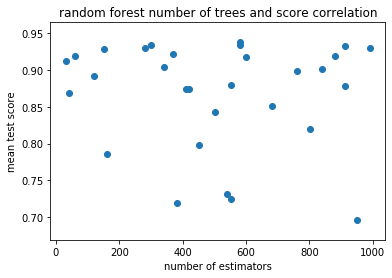

In [139]:
plt.scatter(estimators, mean_scores)
plt.ylabel("mean test score")
plt.xlabel("number of estimators")
plt.title("random forest number of trees and score correlation")

In [140]:
# ahahhah
# 1. отдельно гридсёрчить по параметру кол-во деревьев

In [148]:
cv = RandomizedSearchCV(clf, param_distributions={"n_estimators":np.arange(1, 1000, 2)}, n_iter=250, cv=4, n_jobs=-1)

In [149]:
cv.fit(X, y)

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [150]:
estimators = cv.cv_results_['param_n_estimators'].data
mean_scores = cv.cv_results_['mean_test_score']

Text(0.5, 1.0, 'random forest number of trees and score correlation')

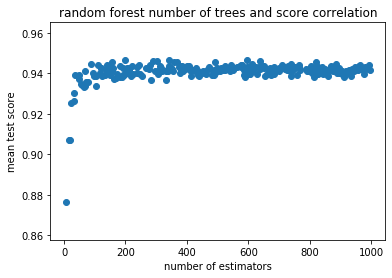

In [156]:
plt.scatter(estimators, mean_scores)
plt.ylabel("mean test score")
plt.xlabel("number of estimators")
plt.title("random forest number of trees and score correlation")